The Data Analysis in Taipei Presale Market  
台北市預售房地產分析
===

## Data Scraping from Actual Price Registration and Storing into SQLite (Jan 2011 to Jun 2024)  
### 實價登錄爬蟲及SQLite資料庫儲存 (民國110年至113年6月)


In this section, we aim to collect data from Taiwan's official *Actual Price Registration* platform, focusing on presale real estate transactions in Taipei City. The data spans from January 2011 to June 2024, covering over a decade of market trends.

目標是從台灣官方的*實價登錄*平台收集資料，重點放在台北市的預售房地產交易。數據範圍涵蓋從2011年1月至2024年6月，覆蓋超過十年的市場趨勢。
  
  
- **Web Scraping:** A Python-based Scrapy framework is used to automate the extraction of transaction data from the *Actual Price Registration* website. The focus is on presale transactions.  
  **網頁爬蟲：** 使用基於Python的Scrapy框架來自動提取*實價登錄*網站上的交易資料，重點放在預售交易。  
  - Collected fields: property type, district, price, area, number of rooms, and transaction date.  
    收集欄位：房屋類型、區域、價格、面積、房間數以及交易日期。  
  - Data saved in an SQLite database for ease of access and future analysis.  
  - 將數據儲存於SQLite資料庫中，便於後續訪問和分析。  
  
- **Challenges:**  
  - Handling changes in the website’s structure over the years.  
  - 處理多年來網站結構的變化。  
  - Filtering only relevant presale transactions from the larger pool of real estate data.
  - 從大量房地產資料中篩選出相關的預售交易。  


![Scrapy](./Pic/Scrapy.png)  
![Scrapy2](./Pic/Scrapy2.png)  
![sql](./Pic/sql.png)  

## Data Cleaning and Geocoding Using TGOS (WGS84 Coordinate System)  
### 將資料清洗後轉移至內政部以導出座標系統 (WGS84)   


Once the raw data is collected, it's necessary to clean and standardize it, particularly focusing on the property addresses.   
The *Taiwan Geographic Information System* (TGOS) is used to convert these addresses into geospatial coordinates (WGS84 format), allowing for spatial analysis.

當收集到原始資料後，必須進行清理和標準化，特別是針對房屋地址。使用*台灣地理資訊系統* (TGOS)將這些地址轉換為地理座標（WGS84格式），以進行空間分析。

- **Address Standardization:** Cleaning and formatting addresses to ensure consistency. This may involve:  
  **地址標準化：** 清理並格式化地址以確保一致性。這可能包括：  
    
  - Removing extra spaces and characters.  
    移除多餘的空格和字符。
  - Converting traditional Chinese formats to a consistent layout.  
    將傳統中文格式轉換為一致的格式。
  
  
- **Geocoding:** Using the TGOS API to map the cleaned addresses to precise geographic coordinates (latitude and longitude).  
  **地理編碼：** 使用TGOS API將清理後的地址映射到精確的地理座標（經緯度）。  
  - Storing these coordinates alongside the original data in the SQLite database.  
    將這些座標與原始資料一起儲存於SQLite資料庫中。  
  
- **Challenges:**  
  - Some addresses may not match perfectly due to variations in spelling or format.  
    由於拼寫或格式的變化，一些地址可能無法完美匹配。 
  - Ensuring high accuracy in the geocoding process.  
    確保地理編碼過程中的高準確性。 


![TGOS](./Pic/TGOS.png)

---

Creating Initial Insights with a Dashboard (Tableau)  
用數位儀表板建置洞悉報告
===


With clean and geocoded data, we now focus on generating meaningful insights through visualizations. A digital dashboard (likely built using Python libraries like Dash or Plotly) allows stakeholders to explore key trends interactively.

通過清理和地理編碼的數據，我們現在專注於通過可視化產生有意義的洞察報告。數位儀表板（可能使用Dash或Plotly等Python庫建置）允許利害關係人以互動方式探索關鍵趨勢。

#### Key Visualizations:  

- **Price Heatmaps:** Displaying property prices across different districts of Taipei, with variations by transaction date and area.  
  **價格熱圖：** 顯示台北市不同區域的房地產價格，隨著交易日期和面積的變化而變動。

- **Time-Series Analysis:** Showing trends in presale prices over time, revealing market peaks and declines.  
  **時間序列分析：** 顯示預售價格隨時間變化的趨勢，揭示市場高峰和低谷。

- **Scatter Plots:** Visualizing the relationship between price, area, and geographic location (coordinates).  
  **散點圖：** 可視化價格、面積與地理位置（座標）之間的關係。

#### Key Metrics:  

- Median price per square meter by district.  
  每個區域的每坪中位價格。
    
- Price trends over time.  
  隨著時間的價格趨勢。  
  
- Popular districts for presale properties.  
  預售房地產熱門區域。
#### Challenges:  

  
- Designing a user-friendly interface that allows for interaction with data filters (e.g., by date range, district).  
  設計用戶友好的界面，允許與數據篩選器（例如按日期範圍、區域）進行互動。

![dashboard](./Pic/dashboard.png)  

https://public.tableau.com/app/profile/victor.yuan/viz/TP_17104211156880/1?publish=yes
---


## Machine Learning for Predictive Analysis
### 進行機器學習模型預測
  
The next step is to leverage machine learning to predict future trends in the presale real estate market. The focus is on building models that can forecast property prices based on historical data, location, and property features.  
接下來的步驟是利用機器學習來預測預售房地產市場的未來趨勢。重點是構建可以根據歷史數據、地理位置和房產特徵來預測房價的模型。

#### Steps:  
#### 步驟:
- **Feature Selection:** Using important features such as transaction date, property size, number of rooms, and geographic coordinates to train the model.  
  **特徵選擇：** 使用重要的特徵，如交易日期、房產面積、房間數和地理座標來訓練模型。

- **Model Training:** A *RandomForestRegressor* model could be a good choice for this task, given its ability to handle non-linear relationships and interactions between features.  
  **模型訓練：** *隨機森林迴歸模型* 可能是這項任務的良好選擇，因為它能夠處理特徵之間的非線性關係和交互作用。  
  Target variable: property price.  
  目標變數：房價。 
  
- **Model Evaluation:** Use metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) to assess the model's accuracy.  
  **模型評估：** 使用平均絕對誤差 (MAE) 或均方根誤差 (RMSE) 等指標來評估模型的準確性。

#### Challenges:  
#### 挑戰:
- Handling the imbalanced distribution of property prices across different regions.
  處理不同區域房價分佈不均的問題。
- Dealing with outliers and missing data in the dataset.
  處理數據集中異常值和缺失值。


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [81]:
from matplotlib import font_manager
import matplotlib.pyplot as plt

font_path = './font/NotoSerifCJKtc-VF.ttf'
font_manager.fontManager.addfont(font_path)
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
print("Loaded font name:", font_prop.get_name())

Loaded font name: Noto Serif CJK TC


## Load cleaned training and test data for Taipei presale real estate
### 載入台北市預售房地產清理後的訓練和測試數據

In [80]:
dftp = pd.read_csv('./train.csv', low_memory=False)
test = pd.read_csv('./test.csv', low_memory=False)
display(dftp.head(2),test.head(2))

,p_name,dist,address,price,tArea,p_price,func,bath,bedroom,room,...,day,date,p_lot,Fl,tFl,P_mb,x,y,dist_MRT,station
0,菁席,中正,仁愛路二段43之1號,2590.0,20.59,159.2,Apartment_M,0,0,0,...,20,2023-12-20,1,3,7,53.72,121.528968,25.038471,270.074474,東門Dongmen
1,當代一號院,大同,重慶北路三段20號,2525.0,33.11,92.7,Condo,1,2,1,...,20,2023-12-20,1,7,16,59.19,121.513452,25.064883,124.768514,大橋頭Daqiaotou


,p_name,dist,address,price,tArea,p_price,func,bath,bedroom,room,...,day,date,p_lot,Fl,tFl,P_mb,x,y,dist_MRT,station
0,城西蒔光,萬華,漢口街二段53巷17號,2910.0,45.77,75.5,Condo,2,3,2,...,30,2024-06-30,1,12,15,58.63,121.506433,25.046384,324.810895,西門Ximen
1,鐫萃,松山,光復北路103巷,6923.0,43.27,160.0,Condo,2,2,2,...,30,2024-06-30,1,4,24,59.12,121.558969,25.050840,567.374616,國父紀念館Sun Yat-Sen Memorial Hall


## Visualizing Numeric Features to Identify Outliers
### 藉由數值特徵的圖像化找出異常值

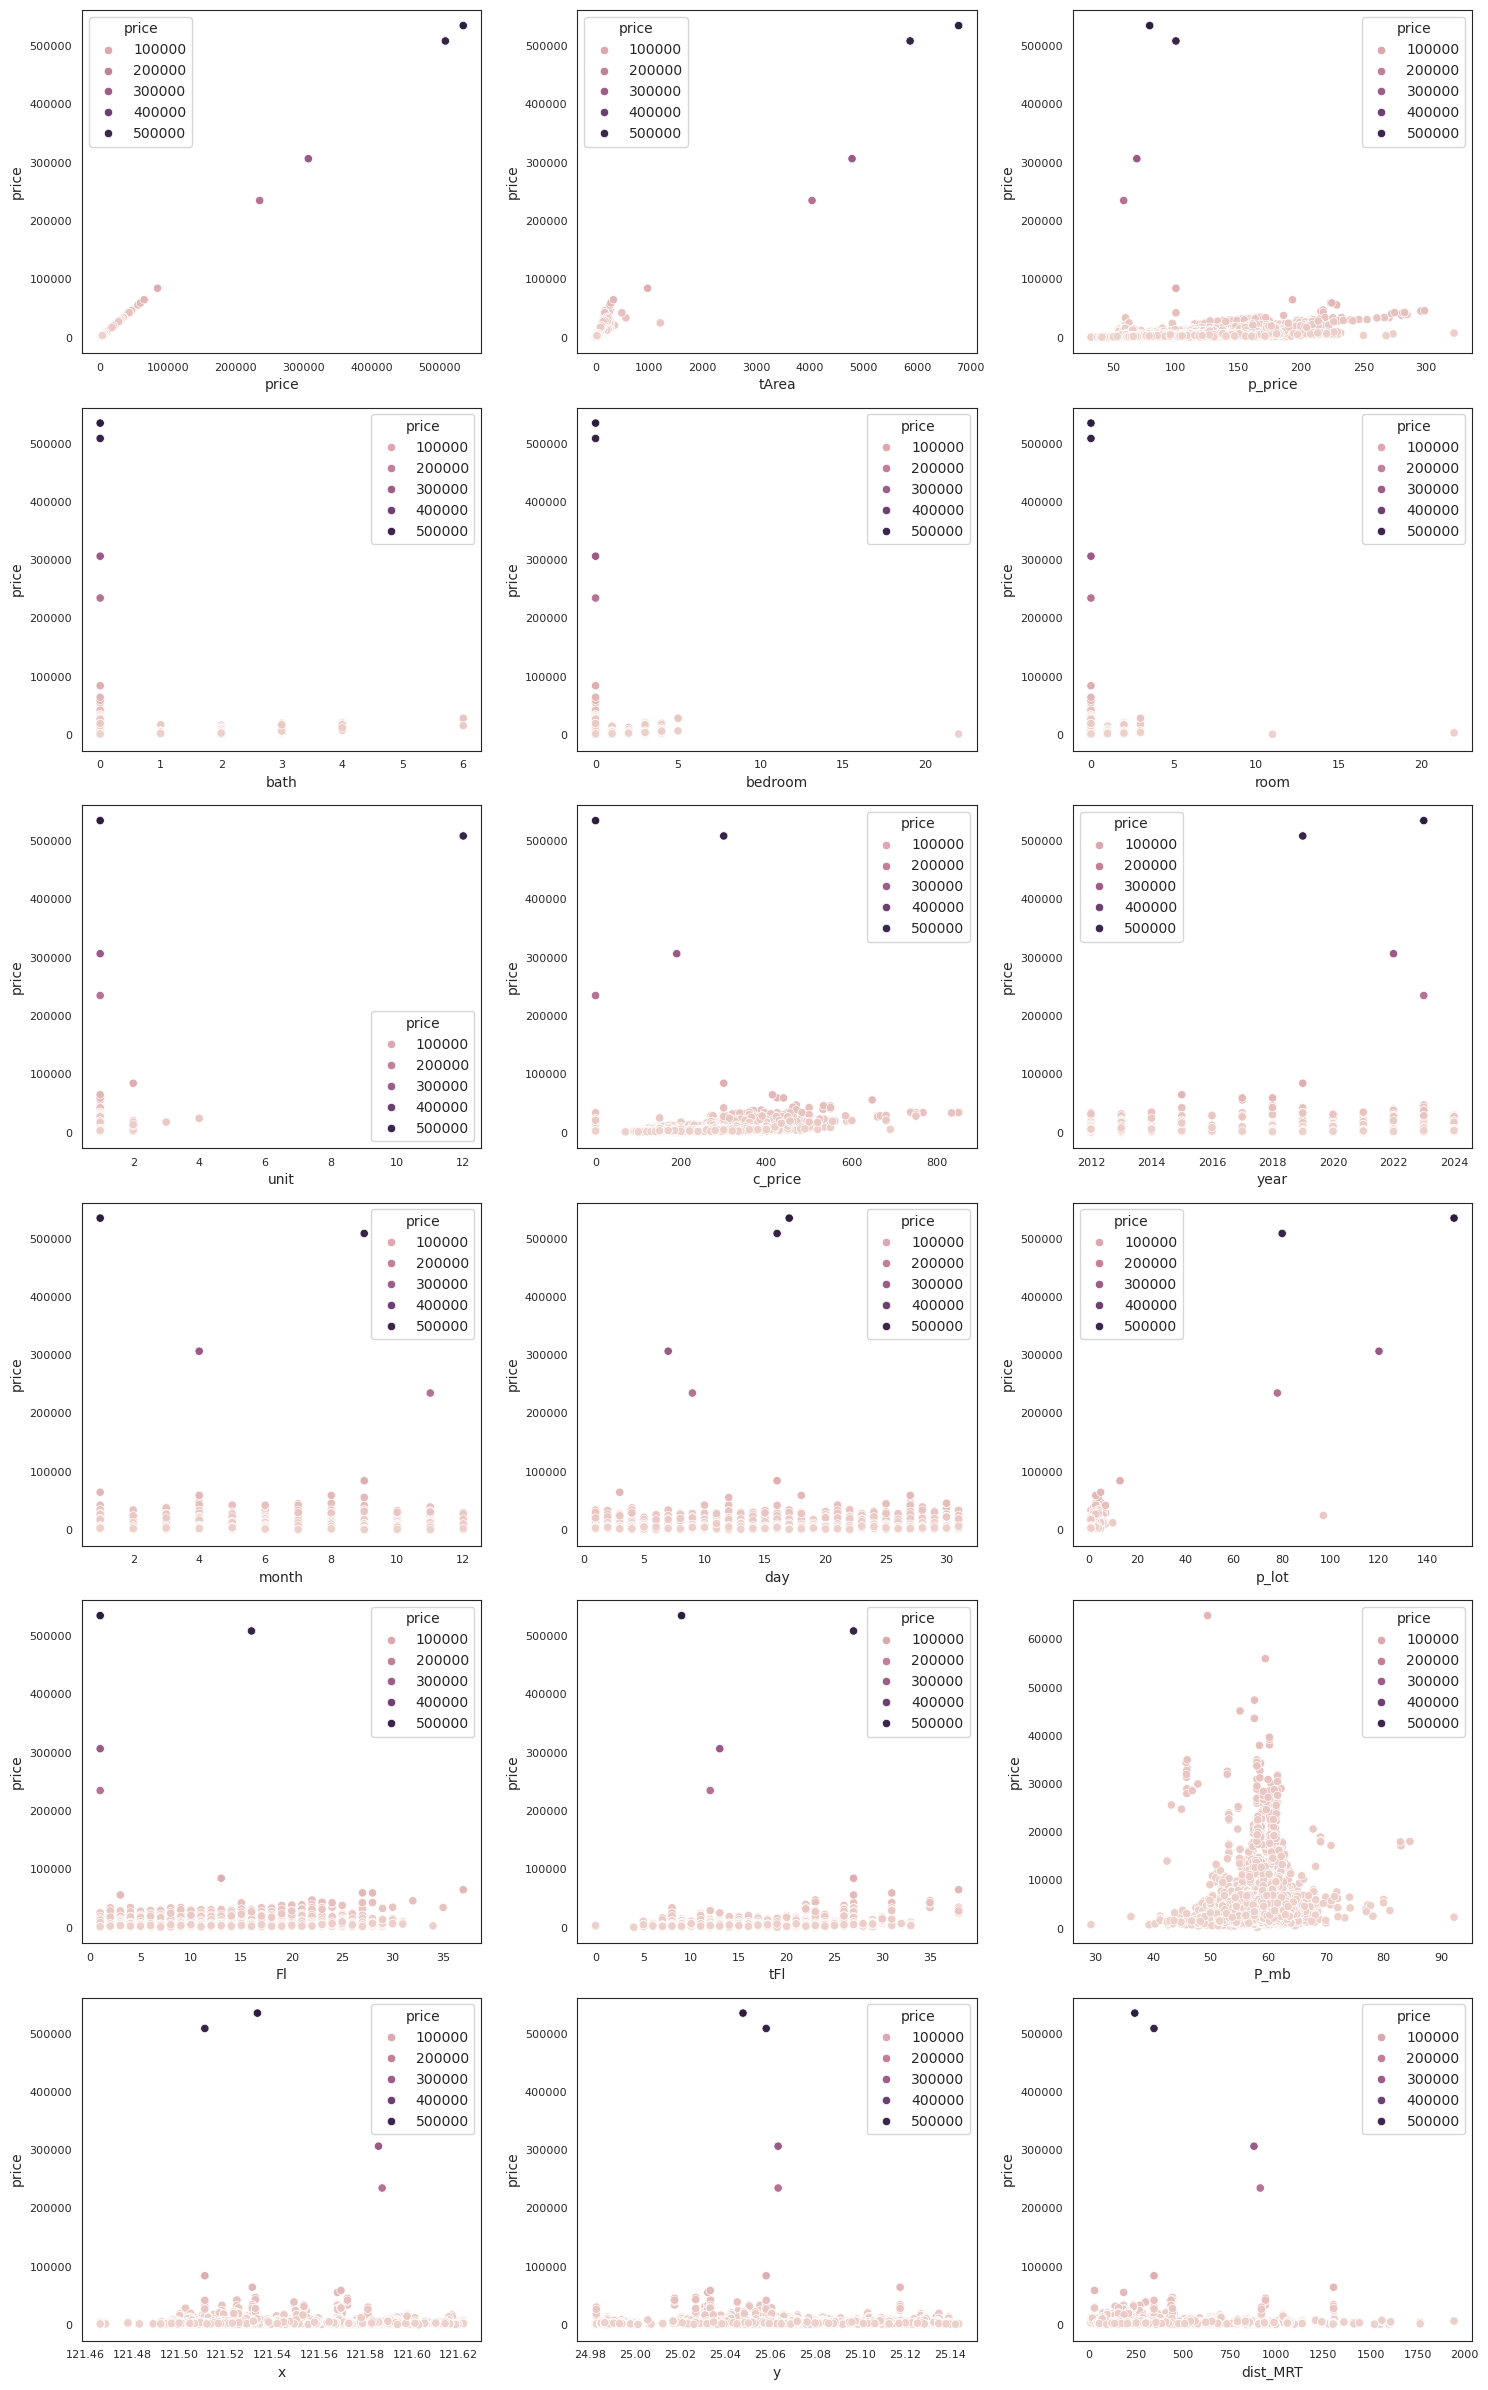

In [46]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = [i for i in dftp.columns if dftp[i].dtype in numeric_dtypes]

n_cols = 3
n_rows = (len(numeric) + n_cols - 1) // n_cols  

plt.figure(figsize=(n_cols * 5, n_rows * 4))  

for idx, i in enumerate(numeric):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.scatterplot(data=dftp, x=i, y='price',hue='price')
    plt.tick_params(axis='x', labelsize=8)
    plt.tick_params(axis='y', labelsize=8)
    
plt.tight_layout()
plt.show()

## Data Filtering and Preprocessing
### 步驟：數據篩選與預處理
1. Convert Floor Levels to Numeric  
   將樓層轉為數值型資料
3. Define and Apply Filters  
   定義並應用篩選條件，過濾異常數據（如房價、房間數、樓層、面積等）
5. Reset Index After Filtering  
   篩選後重設索引
7. Select Columns for Analysis  
   選取關鍵欄位進行分析

In [5]:
test["Fl"] = pd.to_numeric(test["Fl"], errors='coerce')
test["Fl"] = test["Fl"].astype(float)
dftp["Fl"] = pd.to_numeric(dftp["Fl"], errors='coerce')
dftp["Fl"] = dftp["Fl"].astype(float)

# Corrected filter definition
filter = (dftp['price'] <= 20000) & (dftp['price'] >= 300) & (dftp['room'] < 10) & \
         (dftp['bath'] < 10) & (dftp['p_price'] < 300) & (dftp['c_price'] < 600) & \
         (dftp['tFl'] < 30) & (dftp['Fl'] < 30) & (dftp['tArea'] < 100) & (dftp["func"] == "Condo")

# Corrected t_filter definition
t_filter = (test['room'] < 10) & (test['bath'] < 10) & (test['p_price'] < 300) & \
           (test['c_price'] < 600) & (test['tFl'] < 30) & (test['Fl'] < 30) & \
           (test['tArea'] < 100) & (test["func"] == "Condo")

tp = dftp[filter]
test = test[t_filter]

tp.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

tp_analyze = tp[['year', 'bedroom', 'room', 'bath', 'unit', 'p_price', 'tArea', 'c_price', 'Fl', 'tFl', 'p_lot', 'dist_MRT']]
test_analyze = test[['year', 'bedroom', 'room', 'bath', 'unit', 'p_price', 'tArea', 'c_price', 'Fl', 'tFl', 'p_lot', 'dist_MRT']]

Mapping Districts to Numeric Values Based on Average Price & Building Materials  
根據平均價格將區域 建材映射為數值
===
1. Calculate Average Price by District  
   計算各區域的平均價格
3. Rename Columns for Clarity  
   重命名欄位為「區域」和「平均價格」
4. Create a Dictionary Mapping Districts to Numeric Values  
   建立區域對應數值的字典（按照平均價格升冪排序）
5. Replace District Names(Building Materials) with Numeric Values  
   將區域名稱(建材)替換為數值
6. Convert District(Building Materials) Column to Numeric  
   將「區域(建材)」欄位轉換為數值型
7. Apply the Same Mapping to Test Data  
   將相同的映射應用於測試數據

In [58]:
dist_replace = tp.groupby("dist")["p_price"].mean().sort_values(ascending=True)
dist_replace = dist_replace.reset_index()

# 給列重新命名
dist_replace.columns = ['區域', '平均價格']
# 創建區域對應升冪數字的 dictionary
dist_train = {name: idx + 1 for idx, name in enumerate(dist_replace['區域'])}
# 查看 DataFrame
display(dist_replace)

tp_analyze["dist"] = tp["dist"].replace(dist_train)
tp_analyze["dist"] = pd.to_numeric(tp_analyze["dist"], errors='coerce')
test_analyze["dist"] = test["dist"].replace(dist_train)
test_analyze["dist"] = pd.to_numeric(test_analyze["dist"], errors='coerce')

,區域,平均價格
0,萬華,70.382810
1,文山,71.653985
2,北投,84.641950
3,內湖,87.357050
4,大同,87.509003
5,士林,88.569779
6,南港,93.732806
7,中山,109.276244
8,信義,114.386919
9,中正,115.033333


In [59]:
Material_replace = tp.groupby('Material')["p_price"].mean().sort_values(ascending=True)
Material_replace = Material_replace.reset_index()

# 給列重新命名
Material_replace.columns = ['建材', '平均價格']
# 創建區域對應升冪數字的 dictionary
Material_train = {name: idx + 1 for idx, name in enumerate(Material_replace['建材'])}
# 查看 DataFrame
display(Material_replace)

tp_analyze["Material"] = tp["Material"].replace(Material_train)
tp_analyze["Material"] = pd.to_numeric(tp_analyze["Material"], errors='coerce')
test_analyze["Material"] = test["Material"].replace(Material_train)
test_analyze["Material"] = pd.to_numeric(test_analyze["Material"], errors='coerce')

,建材,平均價格
0,RC,88.928860
1,SRC,102.347314
2,SC,118.449566


## Visualizing and Displaying Skewness & Kurtosis  
### 視覺化房價分佈並顯示偏度與峰度

1. Create a Histogram with KDE Curve  
   創建包含核密度估計曲線的房價直方圖，檢查其分佈
3. Calculate and Print Skewness and Kurtosis  
   計算並顯示偏度（Skewness）與峰度（Kurtosis）來分析數據的分佈特徵

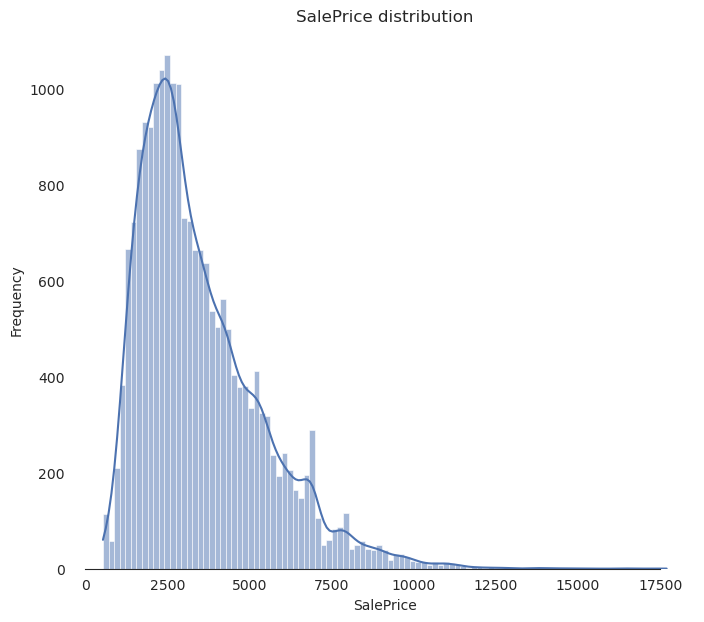

Skewness(偏度): 1.288101
Kurtosis(峰度): 2.288070


In [56]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
# 检查新的分布
sns.histplot(tp['price'], color="b", kde=True)  # 使用 kde=True 添加核密度估计曲线
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()
#skewness and kurtosis
print("Skewness(偏度): %f" % tp['price'].skew())
print("Kurtosis(峰度): %f" % tp['price'].kurt())

## Plotting Log-Transformed Price Distribution with Normal Distribution Curve
### 繪製對數轉換後的房價分佈圖及常態分佈曲線

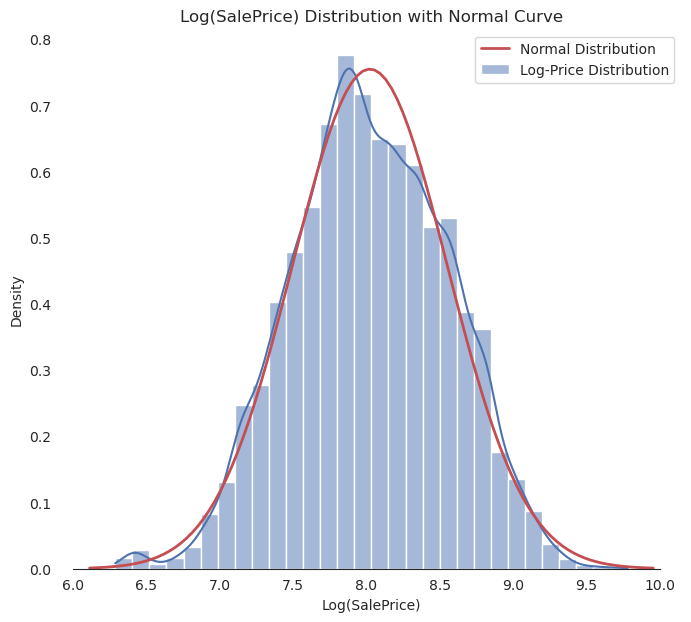

Skewness(偏度): -0.073381
Kurtosis(峰度): -0.251429


In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create a new DataFrame to store the log-transformed prices
log_plot = tp[['price']].copy()
log_plot['log_price'] = np.log1p(log_plot['price'])  # log1p 表示 log(1 + x)，避免 log(0) 問題

# Calculate mean and standard deviation of the log-transformed prices
mean_log_price = log_plot['log_price'].mean()
std_log_price = log_plot['log_price'].std()

# Plot the distribution of log-transformed prices
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

# Plot the new distribution
sns.histplot(log_plot['log_price'], color="b", kde=True, stat="density", bins=30, label='Log-Price Distribution')  # 使用 kde=True 添加核密度估計曲線

# Generate normal distribution curve
xmin, xmax = ax.get_xlim()  # Get current x-axis limits
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_log_price, std_log_price)  # Generate normal PDF based on log price mean and std
ax.plot(x, p, 'r', linewidth=2, label='Normal Distribution')  # Plot normal distribution

# Customize the plot
ax.xaxis.grid(False)
ax.set(ylabel="Density", xlabel="Log(SalePrice)", title="Log(SalePrice) Distribution with Normal Curve")
sns.despine(trim=True, left=True)
plt.legend()
plt.show()

# Calculate skewness and kurtosis after log transformation
print("Skewness(偏度): %f" % log_plot['log_price'].skew())
print("Kurtosis(峰度): %f" % log_plot['log_price'].kurt())


## Creating a Boxplot for Price Distribution by District
### 根據區域創建房價分佈的盒狀圖

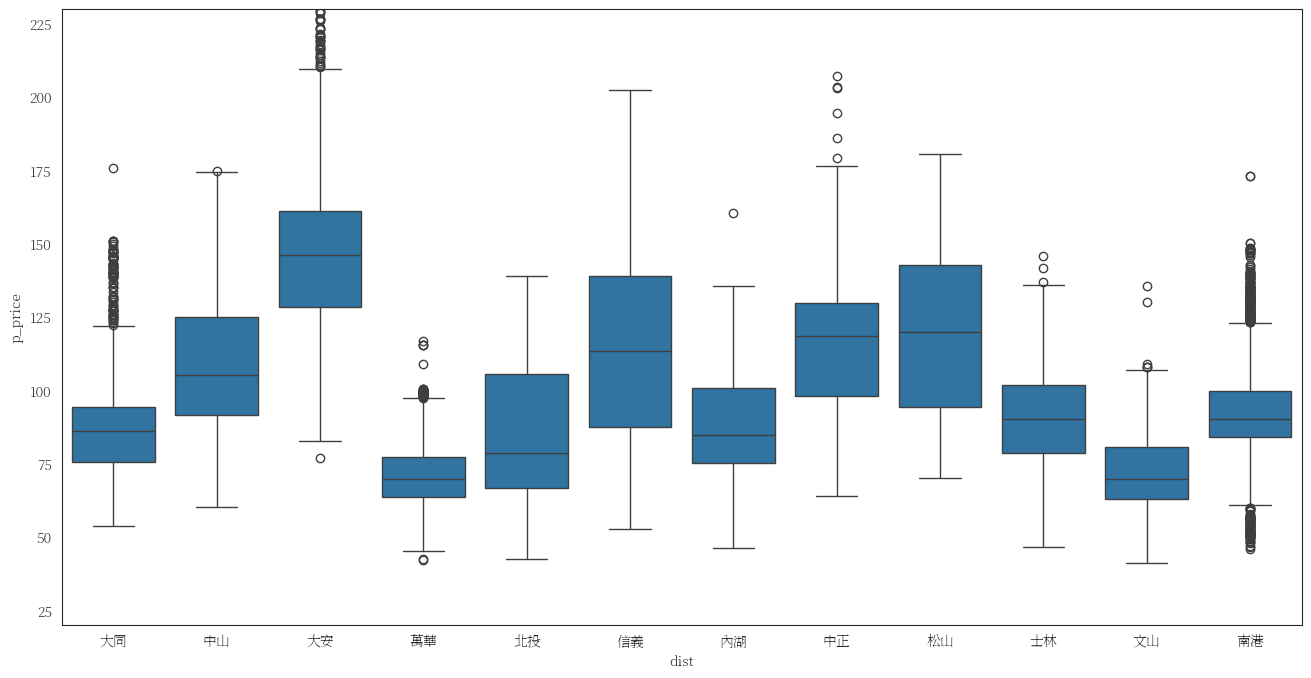

In [82]:
data = pd.concat([tp['p_price'], tp['dist']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="dist", y="p_price", data=data)
fig.axis(ymin=20, ymax=230);
plt.xticks(rotation=0);

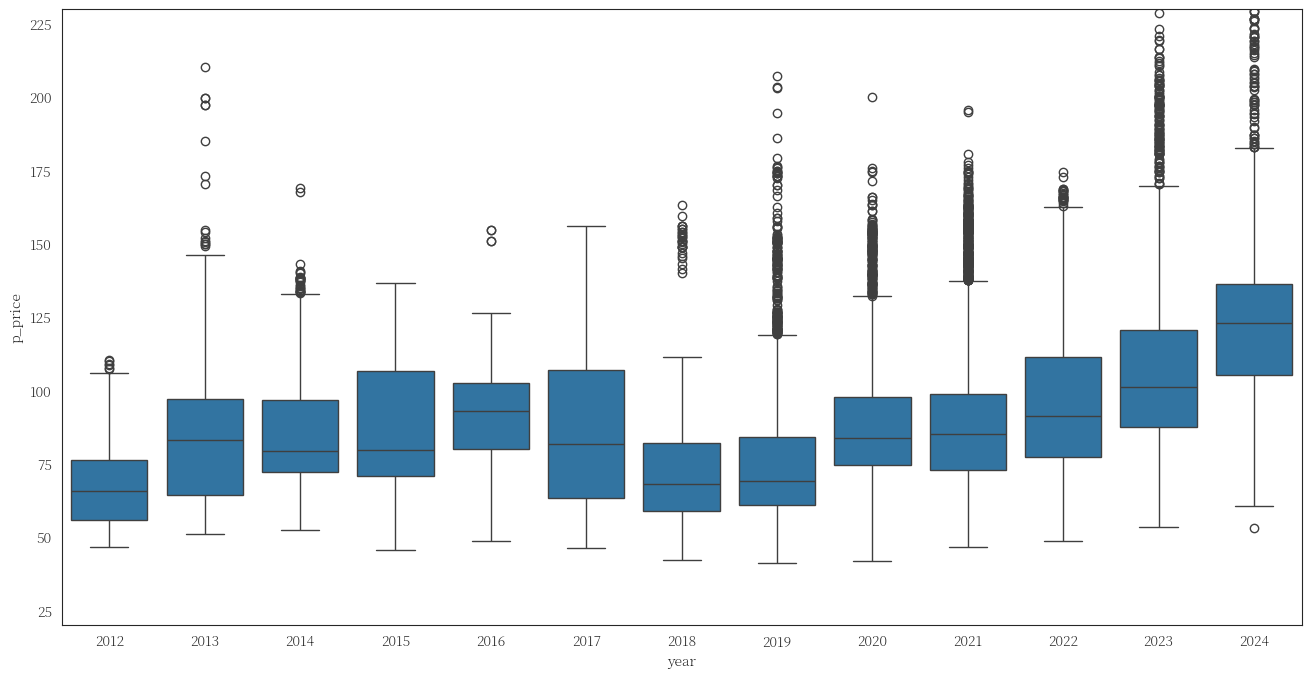

In [51]:
data = pd.concat([tp['p_price'], tp['year']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="year", y="p_price", data=data)
fig.axis(ymin=20, ymax=230);
plt.xticks(rotation=0);

## Visualizing the Correlation Matrix with a Heatmap  
### 使用熱圖視覺化相關矩陣

1. Calculate Correlation Matrix  
   計算數據集中的特徵相關矩陣
3. Display the Heatmap  
   觀察特徵之間的最大相關性（vmax 設置為 0.9）

<Axes: >

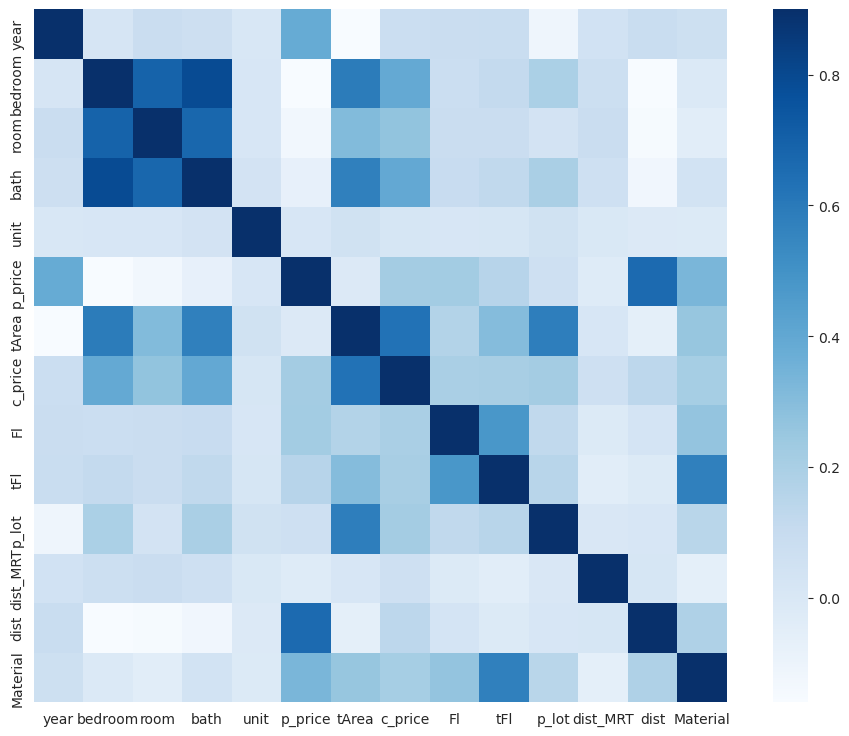

In [15]:
corrmat = tp_analyze.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, cmap="Blues", square=True)

## Creating Scatter Plots of Price vs Area for Each District
### 為每個區域創建價格與面積的散點圖

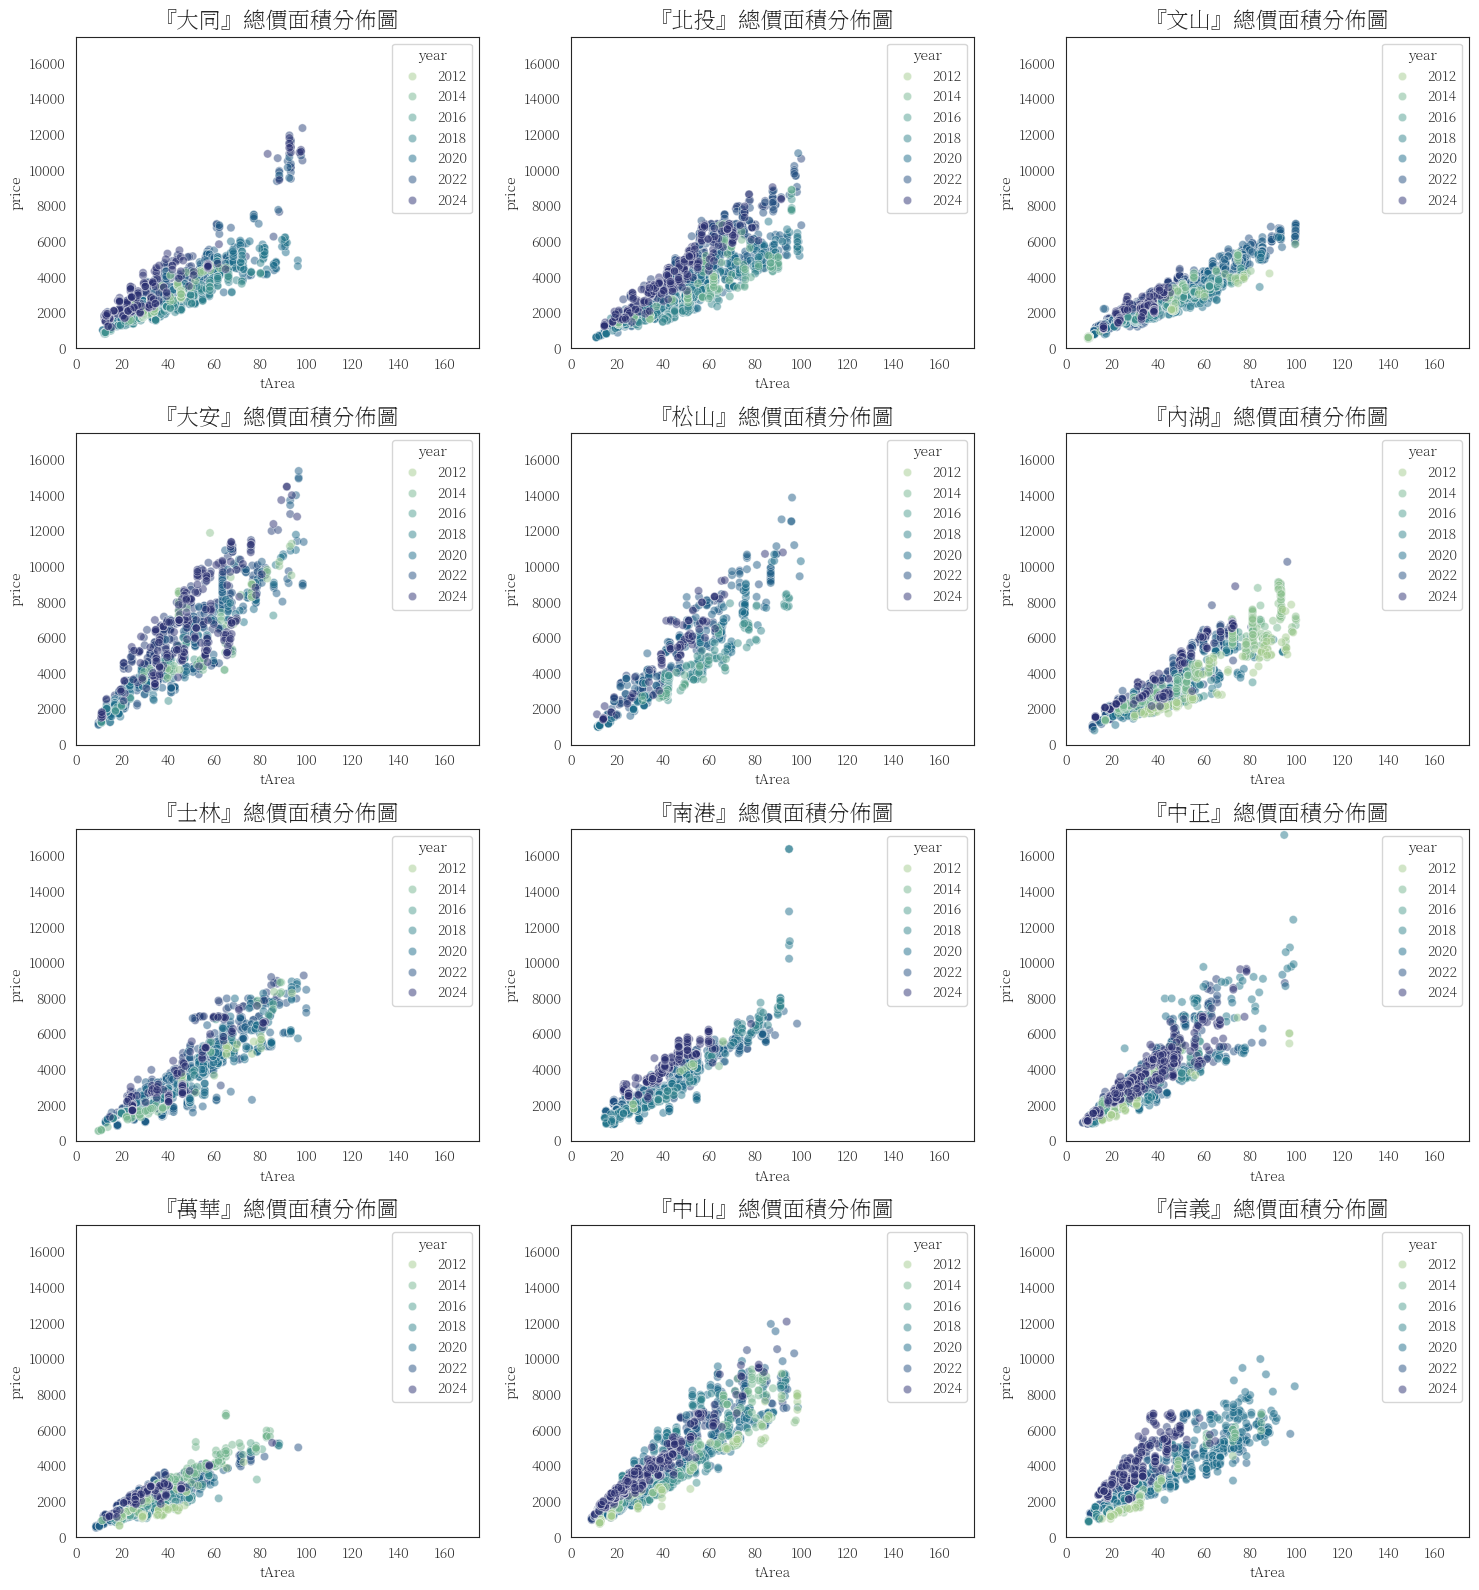

In [70]:
unique_dists = list(set(tp['dist']))
n_cols = 3  
n_rows = (len(unique_dists) + n_cols - 1) // n_cols  

plt.figure(figsize=(n_cols * 5, n_rows * 4))  

for idx, i in enumerate(unique_dists):
    distrix = (tp['dist'] == i)
    data = pd.concat([tp[distrix]['price'], tp['tArea'], tp['year']], axis=1)
    
    ax = plt.subplot(n_rows, n_cols, idx + 1)
    sns.scatterplot(ax=ax, data=data, x='tArea', y='price', hue='year', alpha=0.5, palette="crest")
    ax.set_xlim(0, 175)
    ax.set_ylim(0, 17500)
    ax.set_title(f'『{i}』總價面積分佈圖', fontsize=16)

plt.tight_layout()
plt.show()

## Splitting the Dataset into Training and Validation Sets
### 將數據集分割為訓練集和驗證集

- Define Function to Split Dataset
  定義分割數據集的函數，根據指定比例（默認 30%）隨機選擇測試集  

In [19]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(tp_analyze)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

14622 examples in training, 6200 examples in testing.


## Standardizing Numerical Features
### 標準化數值型特徵

1. Initialize the StandardScaler  
   初始化 StandardScaler，用於對數值型特徵進行標準化處理
3. Identify Numerical Features  
   指定需要標準化的數值型特徵列表（如：tArea, p_price, c_price, Fl, tFl, dist_MRT, dist）
5. Apply StandardScaler to Numerical Features  
   對指定的數值型特徵應用標準化轉換，將它們轉換為均值為 0、標準差為 1 的數據
7. Update the Dataset with Scaled Features  
   將標準化後的特徵更新至 tp_analyze 數據集中

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['tArea', 'p_price', 'c_price', 'Fl', 'tFl','dist_MRT','dist']
tp_analyze[numerical_features] = scaler.fit_transform(tp_analyze[numerical_features])

In [22]:
tp_analyze.head(10)

,year,bedroom,room,bath,unit,p_price,tArea,c_price,Fl,tFl,p_lot,dist_MRT,dist,Material
0,2023,2,1,1,1,-0.082310,-0.481288,0.962583,-0.508404,-0.285648,1,-1.048709,-0.219535,3
1,2023,3,2,2,1,0.340894,0.372482,0.805281,-1.047973,-0.486342,1,0.035468,-0.219535,3
2,2023,2,1,1,1,0.604529,-0.992629,-1.554246,-0.688260,-0.486342,1,-0.149151,0.694818,1
3,2023,1,1,1,1,3.015402,-1.488614,-1.554246,0.031165,-0.887729,1,-0.329309,1.913956,3
4,2023,2,2,1,1,-0.325131,-1.041767,-1.554246,0.750591,-0.687036,1,0.435716,-1.438673,1
5,2023,2,2,2,1,1.079766,-0.251466,1.041234,0.211022,-1.289117,1,-0.031869,0.694818,1
6,2023,3,2,2,1,-0.234940,0.257315,0.647980,-0.688260,0.517127,1,-0.443894,-0.829104,1
7,2023,2,2,2,1,2.980713,-0.304699,-1.554246,2.189442,1.319903,1,0.272095,0.999603,1
8,2023,3,2,2,1,0.413741,0.607422,0.647980,-0.148691,-1.289117,1,0.118541,-0.524319,1
9,2023,2,2,2,1,0.136230,-0.541687,0.097423,0.390878,-0.486342,1,-0.620268,-1.438673,1


## Converting Pandas DataFrames to TensorFlow Datasets for Decision Forests  
### 將Pandas數據框轉換為TensorFlow數據集以進行決策森林模型訓練

In [23]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

label = 'p_price'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

2024-09-23 23:56:13.274316: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 23:56:13.515709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 23:56:13.617200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 23:56:13.646009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 23:56:13.843855: I tensorflow/core/platform/cpu_feature_guar

In [24]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

Initializing and Compiling a Random Forest Model for Regression  
初始化並編譯用於回歸的隨機森林模型
===
1. num_trees: 樹的數量（3000棵）
2. max_depth: 樹的最大深度（12層）
3. min_examples: 每個葉節點中的最少樣本數（4個）
4. random_seed: 隨機種子，用於結果的重現性（42）
5. Compile the Model with Mean Squared Error Metric
6. 編譯模型，並指定使用均方誤差 (mse) 作為評估指標

In [25]:
rf = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION,
    num_trees=3000,
    max_depth=12,
    min_examples=4,
    random_seed=42
)

rf.compile(metrics=["mse"])


Use /tmp/tmpqn3_wwll as temporary training directory


## Training the Random Forest Model
### 訓練隨機森林模型

In [26]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:01.606259. Found 14622 examples.
Training model...


I0000 00:00:1727106977.937009    4589 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1727106977.937280    4589 kernel.cc:775] Collect training examples
I0000 00:00:1727106977.937284    4589 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1727106977.937450    4589 kernel.cc:394] Number of batches: 15
I0000 00:00:1727106977.937456    4589 kernel.cc:395] Number of examples: 14622
I0000 00:00:1727106977.938129    4589 kernel.cc:794] Training dataset:
Number of records: 14622
Number of columns: 14

Number of columns by type:
	NUMERICAL: 14 (100%)

Columns:

NUMERICAL: 14 (100%)
	0: "Fl" NUMERICAL mean:9.82738 min:1 max:29 sd:5.55698
	1: "Material" NUMERICAL mean:1.43968 min:1 max:3 sd:0.669718
	2: "__LABEL

Model trained in 0:00:09.192162
Compiling model...
Model compiled.


In [27]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=6)

In [29]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=14622, accuracy=None, loss=None, rmse=7.072861643042095, ndcg=None, aucs=None, auuc=None, qini=None)

In [30]:
# 假設有 10000 個樣本，每批次大小為 32
num_samples = 1000
batch_size = 320

# 計算總步數
steps_per_epoch = num_samples // batch_size

# 在評估過程中使用這個步數
evaluation = rf.evaluate(x=valid_ds, steps=steps_per_epoch, return_dict=True)

# 打印每個評估指標
for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")


3/3 [==============================] - 1s 243ms/step - loss: 0.0000e+00 - mse: 45.0013
loss: 0.0000
mse: 45.0013


In [31]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


## Visualizing Feature Importance in Random Forest Model
### 視覺化隨機森林模型中的特徵重要性

In [32]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("dist" (1; #6), 1409.0),
 ("c_price" (1; #5), 795.0),
 ("year" (1; #13), 438.0),
 ("Material" (1; #1), 202.0),
 ("tFl" (1; #11), 100.0),
 ("Fl" (1; #0), 39.0),
 ("bedroom" (1; #4), 11.0),
 ("room" (1; #9), 4.0),
 ("dist_MRT" (1; #7), 2.0)]

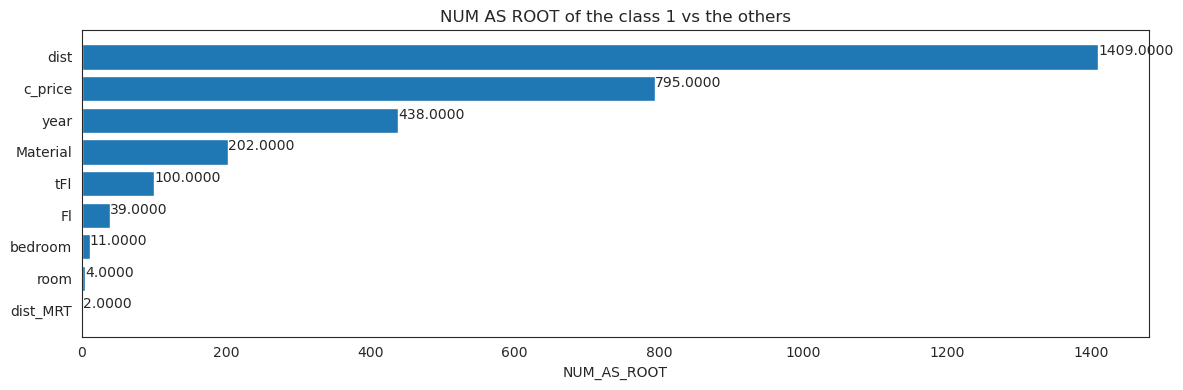

In [33]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [34]:
test_analyze.head(3)

,year,bedroom,room,bath,unit,p_price,tArea,c_price,Fl,tFl,p_lot,dist_MRT,dist,Material
0,2024,3,2,2,1,75.5,45.77,265.0,12.0,15,1,324.810895,1,1
1,2024,2,2,2,1,160.0,43.27,0.0,4.0,24,1,567.374616,11,3
2,2024,0,0,0,1,105.5,17.48,0.0,13.0,13,1,580.614915,11,1


In [36]:
test_analyze.head(10).to_csv("testexp.csv",index = False)

## Making Predictions and Evaluating Deviation from Actual Prices
### 進行價格預測並評估與實際價格的偏差

In [37]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_analyze,
    task = tfdf.keras.Task.REGRESSION)
preds = rf.predict(test_ds)
prise = pd.DataFrame({'p_price': preds.squeeze()})
output = test.copy()
output['predict_price'] = prise['p_price']
output['deviation'] = (output['p_price']-output['predict_price'])/output['predict_price']
output['deviation'] = output['deviation'].apply(lambda x: "{:.2%}".format(x))

# 將 'p_price' 和 'predict_price' 四捨五入至小數點後兩位
output['predict_price'] = output['predict_price'].round(2)


output=output[['dist', 'address', 'p_name', 'tArea',
       'p_price', 'predict_price','deviation',   'p_lot', 'c_price', 'func', 'bath','Material','dist_MRT', 'station' ,'room', 'Fl', 'tFl',
       'date', 'year']] 

4/4 [==============================] - 1s 184ms/step


In [40]:
# 去掉百分比符號並轉換為浮點數
output['deviation'] = output['deviation'].str.rstrip('%').astype('float') / 100

# 篩選偏差平方大於等於 0.25 的行
output.head()

,dist,address,p_name,tArea,p_price,predict_price,deviation,p_lot,c_price,func,bath,Material,dist_MRT,station,room,Fl,tFl,date,year
0,萬華,漢口街二段53巷17號,城西蒔光,45.77,75.5,74.860001,0.0085,1,265.0,Condo,2,RC,324.810895,西門Ximen,2,12.0,15,2024-06-30,2024
1,松山,光復北路103巷,鐫萃,43.27,160.0,160.020004,-0.0001,1,0.0,Condo,2,SC,567.374616,國父紀念館Sun Yat-Sen Memorial Hall,2,4.0,24,2024-06-30,2024
2,松山,八德路四段598之6號,松捷樂,17.48,105.5,107.589996,-0.0194,1,0.0,Condo,0,RC,580.614915,松山Songshan,0,13.0,13,2024-06-30,2024
3,北投,中正路248號,士科潤山,26.73,114.7,100.269997,0.1439,1,0.0,Condo,2,RC,172.743980,士林Shilin,2,4.0,18,2024-06-30,2024
4,信義,基隆路二段23號,華誼信義-閱翠,16.98,173.1,168.869995,0.0251,1,0.0,Condo,1,RC,483.606982,台北101/世貿Taipei 101/World Trade Center,1,9.0,24,2024-06-30,2024


In [41]:
output_filtered = output[(output["deviation"]**2) >= 0.025]
output_filtered.head()

,dist,address,p_name,tArea,p_price,predict_price,deviation,p_lot,c_price,func,bath,Material,dist_MRT,station,room,Fl,tFl,date,year
104,松山,新光路一段32巷18號,敦北VOGUE,27.89,139.2,118.519997,0.1745,1,250.0,Condo,1,RC,531.718329,木柵Muzha,1,15.0,15,2024-06-26,2024
110,北投,永吉路225巷4弄1號,品嘉-箴品序,23.51,74.7,89.160004,-0.1622,1,0.0,Condo,2,RC,391.351494,永春Yongchun,2,3.0,22,2024-06-25,2024
123,松山,新光路一段32巷18號,敦北VOGUE,11.37,150.2,119.150002,0.2606,1,0.0,Condo,1,RC,531.718329,木柵Muzha,1,9.0,15,2024-06-25,2024
170,北投,延平北路一段139號,嘉磐日光,59.88,87.5,104.980003,-0.1665,1,340.0,Condo,2,RC,289.085709,北門Beimen,2,4.0,20,2024-06-22,2024
211,信義,基隆路二段201之1號,緻信義,14.08,168.2,134.839996,0.2474,1,0.0,Condo,0,SRC,39.526504,六張犁Liuzhangli,1,7.0,15,2024-06-21,2024


## Calculating R² (Coefficient of Determination)
### 計算 R²（決定係數）

In [43]:
from sklearn.metrics import r2_score
actual_values = output['p_price'].values  # 實際值
predicted_values = output['predict_price'].values  # 預測值

# 計算 R²
r2 = r2_score(actual_values, predicted_values)

print(f"R² 值: {r2:.4f}")


R² 值: 0.9461
